## Model Building

In [351]:
library(MASS)
library(dplyr)

In [352]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")
set.seed(42)

In [353]:
B <- 1e4
init_data <- read.csv("data/merged_data.csv")[, -1]

In [354]:
no_na <- init_data[!is.na(init_data$food), ]

In [355]:
means <- aggregate(no_na, by=list(GEO=no_na$GEO), mean)
means

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.defaul

GEO,year,month,GEO,pop,protests,retail,oil,food,manufac,power
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alberta,2022.478,NA,NA,4581995.96,14.3043478,8319656.33,4387.21739,937175.348,8873660.609,6489172.70
British Columbia,2022.478,NA,NA,5412289.48,26.0869565,9024311.55,125095.47826,1283290.174,5574813.261,5400146.30
Manitoba,2022.478,NA,NA,1428427.30,9.8695652,2222732.99,5152.78261,204188.652,2155307.435,2218550.35
New Brunswick,2022.478,NA,NA,818066.17,6.1739130,1402415.30,17352.04348,120912.783,2128030.522,1113762.87
Newfoundland and Labrador,2022.478,NA,NA,533920.65,4.4347826,943038.57,97493.08696,81424.174,301443.391,855166.30
Northwest Territories,2022.455,NA,NA,44745.64,0.5909091,76230.69,2921.18182,5954.455,NA,57258.77
Nova Scotia,2022.478,NA,NA,1036178.35,7.0000000,1740475.88,55095.26087,172000.870,897782.957,910680.09
Nunavut,2022.500,NA,NA,40512.44,0.7777778,49825.21,7139.61111,2590.722,NA,16072.83
Ontario,2022.478,NA,NA,15319924.43,52.4782609,24677464.61,164802.30435,2846003.000,31496569.304,11844421.22


In [357]:
replaceFood <- function(food, prov, means) {

    if (is.na(food)) {
        new_val <- means[means$GEO == prov, "food"]
        return(as.numeric(new_val))
    } else {
        return(as.numeric(food))
    }
}

In [358]:
init_data$food <- apply(init_data, MARGIN = 1, function(row) {replaceFood(row["food"], row["GEO"], means)})

In [359]:


init_data$manufac <- NULL

# init_data <- init_data[, 1:5]

init_data

year,month,GEO,pop,protests,retail,oil,food,power
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
2022,April,Alberta,4480956,17,7989056,3983,868863,6069621
2022,April,British Columbia,5310164,42,8959229,77433,1222442,5240902
2022,April,Manitoba,1405197,2,2083495,6290,194206,2168371
2022,April,New Brunswick,801778,5,1340707,1818,116742,1171958
2022,April,Newfoundland and Labrador,529249,2,920444,77160,78292,686123
2022,April,Northwest Territories,44828,0,76390,0,5724,58889
2022,April,Nova Scotia,1014827,2,1689162,47821,164055,899107
2022,April,Nunavut,40489,0,48635,0,1861,16071
2022,April,Ontario,15046211,46,24616762,267687,2682207,10717875


In [360]:
newMonth <- function(x) {
    if (x %in% c("December", "January", "February")) {
        return("Winter")
    } else if (x %in% c("March", "April", "May")) {
        return("Spring")
    } else if (x %in% c("June", "July", "August")) {
        return("Summer")
    } else {
        return("Fall")
    }
}

newProv <- function(x) {
    if (x %in% c("Yukon", "Nunavut", "Northwest Territories")) {
        return("Northern")
    } else {
        return(x)
    }
}

In [361]:
init_data$month <- sapply(init_data$month, newMonth)

head(init_data)

,year,month,GEO,pop,protests,retail,oil,food,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,2022,Spring,Alberta,4480956,17,7989056,3983,868863,6069621
2,2022,Spring,British Columbia,5310164,42,8959229,77433,1222442,5240902
3,2022,Spring,Manitoba,1405197,2,2083495,6290,194206,2168371
4,2022,Spring,New Brunswick,801778,5,1340707,1818,116742,1171958
5,2022,Spring,Newfoundland and Labrador,529249,2,920444,77160,78292,686123
6,2022,Spring,Northwest Territories,44828,0,76390,0,5724,58889


In [362]:
standardize <- function(x, mu, std) {
    return((x-mu)/std)
}

In [363]:
colnames(init_data)[colnames(init_data) == "GEO"] <- "prov"
head(init_data)

,year,month,prov,pop,protests,retail,oil,food,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,2022,Spring,Alberta,4480956,17,7989056,3983,868863,6069621
2,2022,Spring,British Columbia,5310164,42,8959229,77433,1222442,5240902
3,2022,Spring,Manitoba,1405197,2,2083495,6290,194206,2168371
4,2022,Spring,New Brunswick,801778,5,1340707,1818,116742,1171958
5,2022,Spring,Newfoundland and Labrador,529249,2,920444,77160,78292,686123
6,2022,Spring,Northwest Territories,44828,0,76390,0,5724,58889


In [364]:
init_data$prov  <- as.factor(init_data$prov)
init_data$month <- as.factor(init_data$month)
init_data$year <- as.factor(init_data$year)

In [365]:
head(init_data)

,year,month,prov,pop,protests,retail,oil,food,power
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,2022,Spring,Alberta,4480956,17,7989056,3983,868863,6069621
2,2022,Spring,British Columbia,5310164,42,8959229,77433,1222442,5240902
3,2022,Spring,Manitoba,1405197,2,2083495,6290,194206,2168371
4,2022,Spring,New Brunswick,801778,5,1340707,1818,116742,1171958
5,2022,Spring,Newfoundland and Labrador,529249,2,920444,77160,78292,686123
6,2022,Spring,Northwest Territories,44828,0,76390,0,5724,58889


## Fitting the Model

In [366]:
init_data$pop <- sapply(init_data$pop, function(x) {standardize(x, mean(init_data$pop), sd(init_data$pop))})
init_data$retail <- sapply(init_data$retail, function(x) {standardize(x, mean(init_data$retail), sd(init_data$retail))})
init_data$power <- sapply(init_data$power, function(x) {standardize(x, mean(init_data$power), sd(init_data$power))})
init_data$oil <- sapply(init_data$oil, function(x) {standardize(x, mean(init_data$oil), sd(init_data$oil))})
init_data$food <- sapply(init_data$food, function(x) {standardize(x, mean(init_data$food), sd(init_data$food))})

In [367]:
init_data

year,month,prov,pop,protests,retail,oil,food,power
<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2022,Spring,Alberta,0.3320973,17,0.4154217,-0.58844881,0.3739484,0.4393113
2022,Spring,British Columbia,0.5216659,42,0.5517610,0.17683553,0.8040771,0.2824956
2022,Spring,Manitoba,-0.3710644,2,-0.4144921,-0.56441190,-0.4467717,-0.2989093
2022,Spring,New Brunswick,-0.5090145,5,-0.5188768,-0.61100621,-0.5410066,-0.4874573
2022,Spring,Newfoundland and Labrador,-0.5713185,2,-0.5779367,0.17399111,-0.5877810,-0.5793902
2022,Spring,Northwest Territories,-0.6820639,0,-0.6965524,-0.62994817,-0.6760600,-0.6980796
2022,Spring,Nova Scotia,-0.4603085,2,-0.4699081,-0.13169544,-0.4834504,-0.5390880
2022,Spring,Nunavut,-0.6830559,0,-0.7004528,-0.62994817,-0.6807593,-0.7061819
2022,Spring,Ontario,2.7474632,46,2.7521281,2.15911473,2.5798809,1.3188851


In [368]:
model1 <- glm.nb(protests ~., data=init_data, init.theta = 1)

In [369]:
summary(model1)


Call:
glm.nb(formula = protests ~ ., data = init_data, init.theta = 8.787356117, 
    link = log)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.49134    0.82959   4.208 2.57e-05 ***
year2023                       0.09127    0.07835   1.165   0.2441    
monthSpring                   -0.03918    0.08668  -0.452   0.6513    
monthSummer                   -0.53066    0.08765  -6.054 1.41e-09 ***
monthWinter                   -0.17789    0.09594  -1.854   0.0637 .  
provBritish Columbia           0.70090    0.37307   1.879   0.0603 .  
provManitoba                  -1.61586    1.63901  -0.986   0.3242    
provNew Brunswick             -2.21134    1.93107  -1.145   0.2522    
provNewfoundland and Labrador -2.57320    2.06609  -1.245   0.2130    
provNorthwest Territories     -4.84238    2.34607  -2.064   0.0390 *  
provNova Scotia               -2.03238    1.82298  -1.115   0.2649    
provNunavut                   -4.4

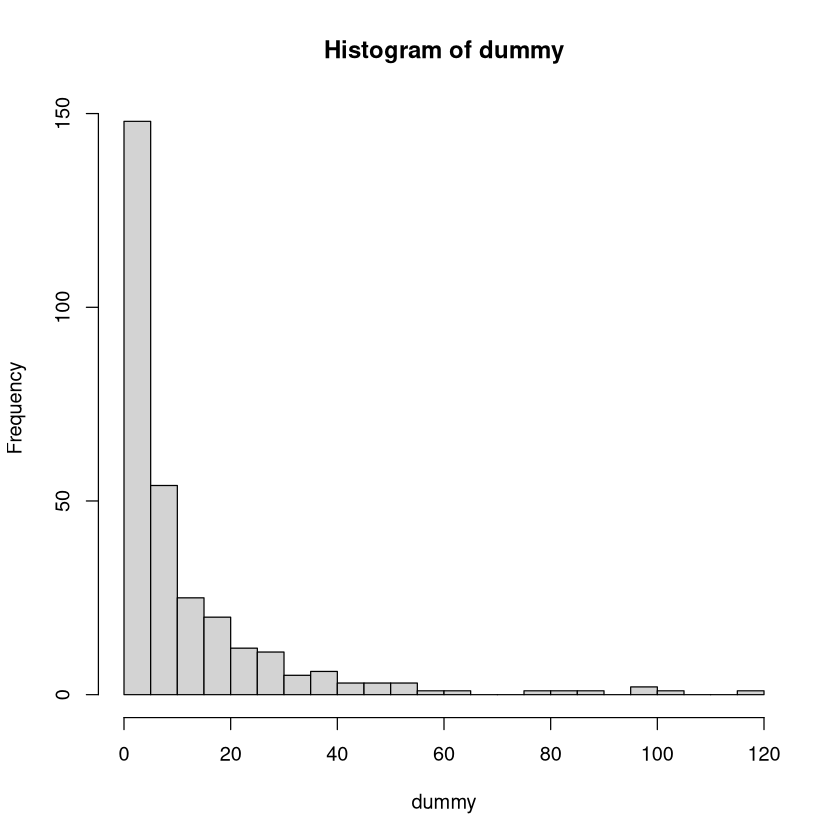

In [370]:
dummy <- rnegbin(fitted(model1), theta = 8.68)
hist(dummy, breaks=25)

In [371]:
anova(model1)

Warning message in anova.negbin(model1):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,298,2151.0784,NA
year,1,1.022458e+00,297,2150.0560,3.119367e-01
month,3,5.355482e+01,294,2096.5012,1.396212e-11
prov,12,1.737473e+03,282,359.0283,0.000000e+00
pop,1,6.022725e-03,281,359.0222,9.381413e-01
retail,1,5.208708e+00,280,353.8135,2.247403e-02
oil,1,3.983980e-01,279,353.4151,5.279178e-01
food,1,5.640837e-01,278,352.8511,4.526195e-01
power,1,2.134495e+00,277,350.7166,1.440179e-01


In [372]:
data <- init_data[, -c(1, 4, 7, 8, 9)]
model <- glm.nb(protests ~., data=data, init.theta = 1)

summary(step(model))
# names(summary(model))
# summary(model)

Start:  AIC=1584.06
protests ~ month + prov + retail + power

         Df Deviance    AIC
- power   1   350.06 1583.0
<none>        349.12 1584.1
- retail  1   352.66 1585.6
- month   3   397.71 1626.7
- prov   12   740.51 1951.5

Step:  AIC=1583
protests ~ month + prov + retail

         Df Deviance    AIC
<none>        349.20 1583.0
- retail  1   352.33 1584.1
- month   3   397.19 1625.0
- prov   12   745.36 1955.2



Call:
glm.nb(formula = protests ~ month + prov + retail, data = data, 
    init.theta = 8.30561596, link = log)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.68364    0.50985   7.225 5.01e-13 ***
monthSpring                   -0.06502    0.08264  -0.787 0.431441    
monthSummer                   -0.55217    0.08629  -6.399 1.57e-10 ***
monthWinter                   -0.22871    0.08873  -2.578 0.009946 ** 
provBritish Columbia           0.81551    0.16310   5.000 5.73e-07 ***
provManitoba                  -1.91505    0.92108  -2.079 0.037605 *  
provNew Brunswick             -2.62399    1.04409  -2.513 0.011965 *  
provNewfoundland and Labrador -3.06967    1.11340  -2.757 0.005833 ** 
provNorthwest Territories     -5.35839    1.26866  -4.224 2.40e-05 ***
provNova Scotia               -2.41344    0.99351  -2.429 0.015133 *  
provNunavut                   -4.98454    1.26290  -3.947 7.92e-05 ***
provOntario         

## Bootstrap Methods

### 1. Resampling Bootstrap

In [373]:
resampBoot <- function(df, B) {

    # Get sample size
    n <- nrow(df)
    # Initialize empty dataframe
    params <- c()
    # Initialize progress bar
    bar <- txtProgressBar(min=0, max=B, style=1)
    # Perform B iterations
    for (b in 1:B) {
        # Select a sample of size n
        indices <- sample(1:n, replace = TRUE)
        samp <- df[indices, ]
        # Fit the model with the sample
        boot_model <- glm.nb(protests ~., data=samp, init.theta = 10)
        boot_params <- coef(boot_model)
        params <- rbind(params, boot_params)
        setTxtProgressBar(bar, b)
    }
    close(bar)
    return(params)  
}

In [374]:
# boot_models <- resampBoot(data, B)
# boot_models <- as.data.frame(boot_models)
# write.csv(boot_models, "data/results/resamp_boot_results.csv")

### 2. Parametric Bootstrap

In [375]:
conditionalNegBinom <- function(theta, mu) {
    nb_sample <- rnbinom(size=theta, mu=mu, n=1)
    return(nb_sample)
}

In [376]:
paramBoot <- function(B, X, yhat, theta, func) {

    # Initialize empty vector
    params <- c()
    # Iterate B times
    for (b in 1:B) {
        # Simulate NB given means
        sim_y <- sapply(yhat, function(y) func(theta, y))
        # Add to the dataframe
        sim_data <- cbind(X, protests=sim_y)
        # Fit the model to the simulated data
        sim_model <- glm.nb(protests ~., data=sim_data, init.theta = theta)
        # Access the coefficients and store
        parameters <- coef(sim_model)
        params <- rbind(params, parameters)
    }
    return(params)
}

In [377]:
model <- glm.nb(protests ~., data=data, init.theta = 1)

theta <- summary(model)$theta
X <- data[, c(1,2,4)]
yhat <- fitted(model)

In [378]:
# parametric_results <- paramBoot(B, X, yhat, theta, func=conditionalNegBinom)
# param_results <- as.data.frame(parametric_results)
# write.csv(param_results, "data/results/param_boot_results.csv")

### 3. Error Bootstrap

In [379]:
epsilonBoot <- function(X, model, B, err_mean, err_sd, errors) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    # Perform B iterations
    for (b in 1:B) {
        # Get errors
        # errs <- rnorm(n=n, mean=err_mean, sd=1)
        errs <- sample(errors, size=n, replace=TRUE)
        # Get fitted values
        yhat <- fitted(model)
        # Get simulated y
        ystar <- yhat + errs
        # round up negative values
        ystar <- pmax(rep(0, n), ystar)
        # Turn into DataFrame
        sim_data <- data.frame(protests=ystar, X)
        # round to integers
        # sim_data$protests <- round(sim_data$protests)
        
        # Fit the model with the simulated data
        paramboot_model <- glm.nb(protests ~., data=sim_data, init.theta = 5)
        boot_params <- coef(paramboot_model)
        params <- rbind(params, boot_params)
    }
    return(params)
}

In [380]:
model <- glm.nb(protests ~., data=data, init.theta = 10)

In [381]:
X <- data[, c(1,2,4)]
epsilon <- resid(model)
err_mean <- mean(epsilon)
err_sd <- sd(epsilon)

In [382]:
# suppressWarnings({
#   error_models <- epsilonBoot(X, model, B, err_mean, err_sd, epsilon)
# })
# error_results <- as.data.frame(error_models)
# write.csv(param_results, "data/results/error_boot_results.csv")

### 3. Smooth Bootstrap

In [383]:
addNoise <- function(X) {

    cols <- colnames(X)
    new_X <- X
    for (col in cols) {
        Xi <- X[, col]
        if (class(data[, col]) != "factor") {
            n <- length(Xi)
            S_sq <- var(Xi)
            noise_var <- S_sq / n
            new_X[, col] <- Xi + rnorm(n=n, mean=0, sd=sqrt(noise_var))
        } else {
            new_X[, col] <- Xi
        }
    }
    return(new_X)
}

In [384]:
smoothBoot <- function(X, y, B, noisefunc) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    
    # Initialize progress bar
    pb <- txtProgressBar(min = 0, max = B, style = 3)
    
    # Perform B iterations
    for (b in 1:B) {
        # Update progress bar
        setTxtProgressBar(pb, b)
        
        # Get new dataset
        new_X <- noisefunc(X)
        new_data <- data.frame(protests=y, new_X)
        
        # Fit the model with the simulated data
        smoothboot_model <- glm.nb(protests ~., data=new_data, init.theta = 5)
        boot_params <- coef(smoothboot_model)
        params <- rbind(params, boot_params)
    }
    
    # Close progress bar
    close(pb)
    
    return(params)
}

In [388]:
X <- data[, c(1,2,4)]
y <- data$protests


ERROR: Error in `[.data.frame`(data, , c(c(1, 2, 4), "oil")): undefined columns selected


In [386]:
# smooth_data <- smoothBoot(X, y, B, addNoise)
# smooth_results <- as.data.frame(smooth_data)
# write.csv(smooth_results, "data/results/smooth_boot_results.csv")

## Monte Carlo Prediction

In [387]:
# Assuming 'data' is your data frame and 'month' is the column with the month names
month_names <- c("January", "February", "March", "April", "May", "June", 
                 "July", "August", "September", "October", "November", "December")
data$month_number <- match(data$month, month_names)

data$year <- as.integer(init_data$year)
data$t <- data$month_number
data[data$year == 2, ]$t = data[data$year == 2, ]$t + 12

data[, c("year", "month_number")] <- NULL

### Make Predictions